# Analyzing data science articles

This notebook recreate the study present [here](https://medium.com/the-mission/this-new-data-will-make-you-rethink-how-you-write-headlines-751358f6639a) focusing in data science articles. 

The data for this notebook can be found [here](https://www.kaggle.com/viniciuslambert/medium-data-science-articles-dataset).


## CRISP-DM

- Business Undestanding
- Data Undestanding
- Prepare Data
- Model Data
- Result 
- Deploy

## TODO


- [X] What words combinations get the most Engagement?
- [X] What words combinations get less engagement?
- [ ] What words combinations get more engagement in the start of headline?
- [ ] What words combinations get more engagement in the end of headline?
- [ ] What is the 'magical' number that get most engament?
- [ ] What is the better day to post?

In [2]:
import numpy as np
import pandas as pd
import unicodedata
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_colwidth', None)

df = pd.read_csv('medium-data-science-articles-2020.csv')


print(df.shape)
df.head()

(108021, 10)


,url,title,author,author_page,subtitle,claps,responses,reading_time,tag,date
0,https://towardsdatascience.com/making-python-programs-blazingly-fast-c1cd79bd1b32,Making Python Programs Blazingly Fast,martin.heinz,https://towardsdatascience.com/@martin.heinz,Let’s look at the performance of our Python programs and see how…,3300.0,3,5,Data Science,2020-01-01
1,https://towardsdatascience.com/how-to-be-fancy-with-python-8e4c53f47789,How to be fancy with Python,dipam44,https://towardsdatascience.com/@dipam44,Python tricks that will make your life easier,1700.0,12,5,Data Science,2020-01-01
2,https://uxdesign.cc/how-exactly-do-you-find-insights-from-qualitative-user-research-603bcafbc8b3,How exactly do you find insights from qualitative user research?,taylornguyen144,https://uxdesign.cc/@taylornguyen144,Visualizing the synthesis processes…,1100.0,3,4,Data Science,2020-01-01
3,https://towardsdatascience.com/from-scratch-to-search-playing-with-your-data-elasticsearch-ingest-pipelines-6d054bf5d866,From scratch to search: playing with your data (Elasticsearch Ingest Pipelines),stanislavprihoda,https://towardsdatascience.com/@stanislavprihoda,One Pipeline to rule…,232.0,1,9,Data Science,2020-01-01
4,https://www.cantorsparadise.com/the-waiting-paradox-an-intro-to-probability-distributions-97c0aedb8c1,The Waiting Paradox: An Intro to Probability Distributions,maikeelisa,https://www.cantorsparadise.com/@maikeelisa,How much longer do I have to wait for my…,859.0,5,8,Data Science,2020-01-01


# Preparing data

## Find url duplicateds values and drop it

In [3]:
print(f' We have {df.url.duplicated().sum()} duplicated values in url colum')
df.shape
#df[df.url.duplicated(keep=False)]

 We have 50 duplicated values in url colum


(108021, 10)

In [4]:
# I analysed the values and conclude that the correct duplicated values 
#is aways the first! So let's keep it.

df = df.drop_duplicates(subset=['url'], keep='first')
print(f' We have {df.url.duplicated().sum()} duplicated values in url colum')
df.shape

 We have 0 duplicated values in url colum


(107971, 10)

## Modeling Data

### Data understanding

In [5]:
#df.title[:30]

### Cleaning the data

As you can see, it has some confusing character, so we need to normalize the data.

In [6]:
def normalize_title(title):
    title = unicodedata.normalize("NFKD", title) # normalize data
    title = re.sub('<[^>]+>', '', title) # remove anything beteween <> (html noise)
    title = re.sub(" \d+", r" X", title) # replace numbers by X 
    return title 
    
df.title = df.title.apply(normalize_title)
df.title[:10]

0                                              Making Python Programs Blazingly Fast
1                                                        How to be fancy with Python
2                   How exactly do you find insights from qualitative user research?
3    From scratch to search: playing with your data (Elasticsearch Ingest Pipelines)
4                         The Waiting Paradox: An Intro to Probability Distributions
5                                 Sentiment Analysis of Movie Reviews in NLTK Python
6                               How to Write Scripts That Check Data Quality For You
7                      Gradient Based Optimizations: Jacobians, Jababians & Hessians
8                     [Time Series Forecast] Anomaly detection with Facebook Prophet
9                                                         Decision Trees for Dummies
Name: title, dtype: object

## Get data insights
### Extracting data from word combinations in headline

In [52]:
dict_word_combinations = {}

for title, claps, responses in zip(df.title, df.claps, df.responses):
    splited_title = title.split(' ')
    if len(splited_title) > 2:
        for i in range((len(splited_title) - 2)):
            word_combination = f'{splited_title[i]} {splited_title[i+1]} {splited_title[i+2]}'
            if word_combination in dict_word_combinations.keys():
                dict_word_combinations[word_combination]['frequency'] += 1
                dict_word_combinations[word_combination]['total_claps'] += claps
                dict_word_combinations[word_combination]['total_responses'] += responses
            else:
                dict_word_combinations[word_combination] = {'word_combination': word_combination,
                                                            'frequency' : 1, 
                                                            'total_claps': claps,
                                                            'total_responses': responses}
            

In [58]:
list_word_combination = [dict_word_combinations[x] for x in dict_word_combinations.keys() ]
list_word_combination_sorted_by_count = sorted(list_word_combination, key=lambda x: x['frequency'], reverse=True)

df_word_combination_sorted_by_count = pd.DataFrame(list_word_combination_sorted_by_count)
df_word_combination_sorted_by_count

,word_combination,frequency,total_claps,total_responses
0,— Part X,673,31124.0,104
1,in Machine Learning,403,33180.0,98
2,for Data Science,348,48209.0,236
3,and Machine Learning,307,18270.0,59
4,Natural Language Processing,284,26311.0,70
...,...,...,...,...
483987,Balanced Scorecard Dashboard,1,0.0,0
483988,Scorecard Dashboard —,1,0.0,0
483989,Dashboard — Adding,1,0.0,0
483990,— Adding Value,1,0.0,0


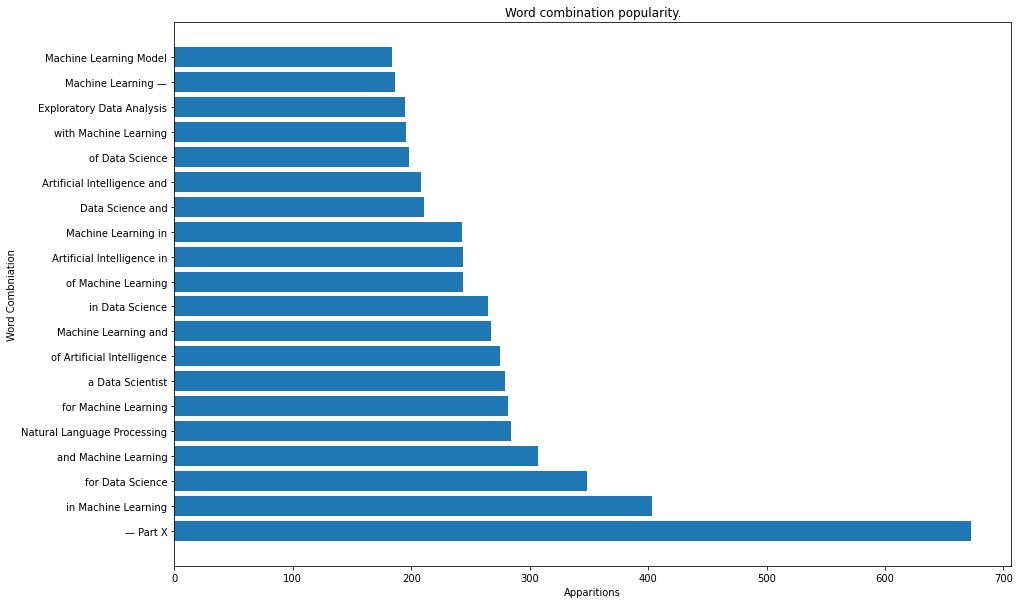

In [54]:
plt.figure(figsize=(15, 10))
plt.barh(df_word_combination_sorted_by_count.word_combination[:20],df_word_combination_sorted_by_count.frequency[:20])
plt.title('Word combination popularity.')
plt.xlabel('Apparitions')
plt.ylabel('Word Combniation')
plt.show()

### What headline set of words atract more claps?

In [59]:
#list_word_combination

[{'word_combination': 'Making Python Programs',
  'frequency': 1,
  'total_claps': 3300.0,
  'total_responses': 3},
 {'word_combination': 'Python Programs Blazingly',
  'frequency': 1,
  'total_claps': 3300.0,
  'total_responses': 3},
 {'word_combination': 'Programs Blazingly Fast',
  'frequency': 1,
  'total_claps': 3300.0,
  'total_responses': 3},
 {'word_combination': 'How to be',
  'frequency': 33,
  'total_claps': 5831.0,
  'total_responses': 27},
 {'word_combination': 'to be fancy',
  'frequency': 2,
  'total_claps': 2673.0,
  'total_responses': 13},
 {'word_combination': 'be fancy with',
  'frequency': 2,
  'total_claps': 2673.0,
  'total_responses': 13},
 {'word_combination': 'fancy with Python',
  'frequency': 1,
  'total_claps': 1700.0,
  'total_responses': 12},
 {'word_combination': 'How exactly do',
  'frequency': 1,
  'total_claps': 1100.0,
  'total_responses': 3},
 {'word_combination': 'exactly do you',
  'frequency': 1,
  'total_claps': 1100.0,
  'total_responses': 3},
 

In [68]:
# Get only the popular set words, the one with more than X aparitions
X = 50
list_word_combination_trashholded = [ x for x in list_word_combination if x['frequency'] >= X]


print(f' There are {len(list_word_combination_trashholded)} set of words that appear more than {X} times')

 There are 183 set of words that appear more than 50 times


In [69]:
# Extrac the mean value of the set of words.

for word_combination in list_word_combination_trashholded:
    word_combination['claps_mean'] = word_combination['total_claps'] / word_combination['frequency']
           
#list_word_combination_trashholded

In [72]:
list_word_combination_trashholded_sorted_by_clap_means = sorted(list_word_combination_trashholded,
                                                                key=lambda x: x['claps_mean'], reverse=True)

df_word_combination_trashholded_sorted_by_clap_means = pd.DataFrame(list_word_combination_trashholded_sorted_by_clap_means)
df_word_combination_trashholded_sorted_by_clap_means

,word_combination,frequency,total_claps,total_responses,claps_mean
0,Become a Data,60,25016.0,166,416.933333
1,your Data Science,59,21758.0,69,368.779661
2,Machine Learning Engineer,54,13616.0,50,252.148148
3,a Data Scientist,279,66371.0,464,237.888889
4,in X Minutes,79,18631.0,162,235.835443
...,...,...,...,...,...
178,Curve: Episode X,61,324.0,0,5.311475
179,D4S Sunday Briefing,51,146.0,0,2.862745
180,Billion By X,84,31.0,0,0.369048
181,Market Size Worth,57,7.0,0,0.122807


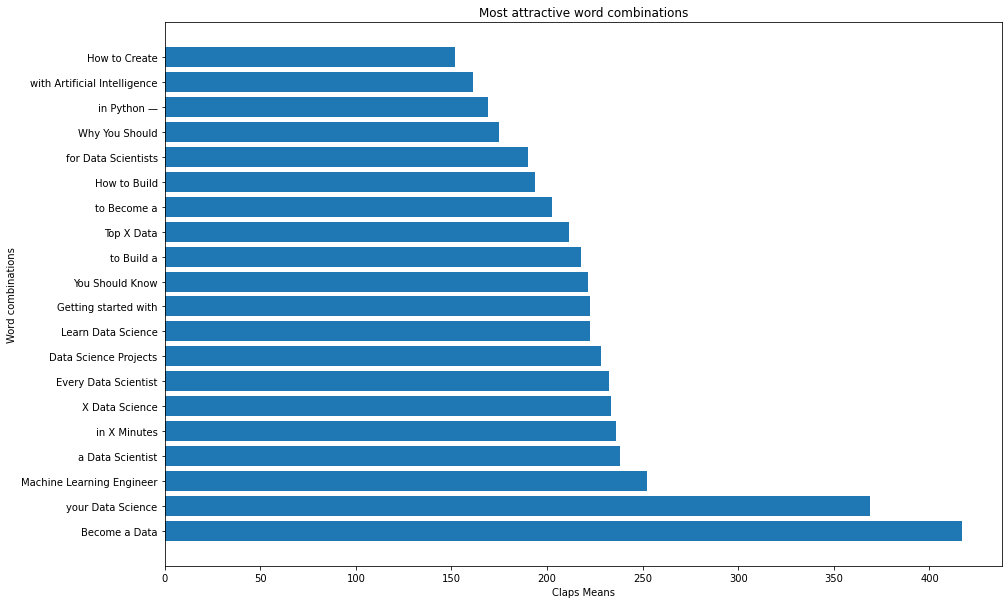

In [73]:
plt.figure(figsize=(15, 10))
plt.barh(df_word_combination_trashholded_sorted_by_clap_means.word_combination[:20],
         df_word_combination_trashholded_sorted_by_clap_means.claps_mean[:20])
plt.title('Most attractive word combinations')
plt.xlabel('Claps Means')
plt.ylabel('Word combinations')
plt.show()

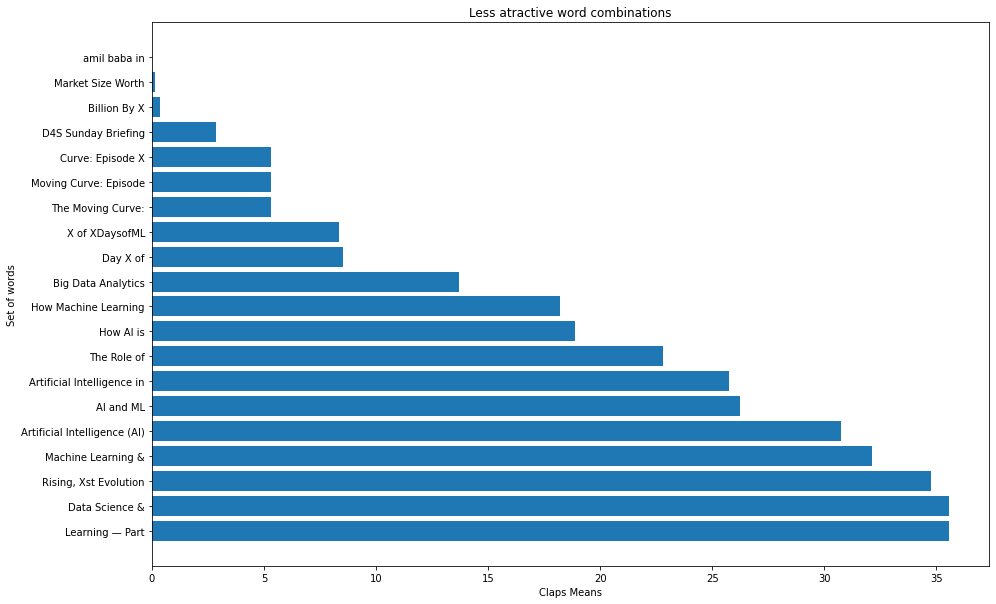

In [74]:
plt.figure(figsize=(15, 10))
plt.barh(df_word_combination_trashholded_sorted_by_clap_means.word_combination[-20:],
         df_word_combination_trashholded_sorted_by_clap_means.claps_mean[-20:])
plt.title('Less atractive word combinations')
plt.xlabel('Claps Means')
plt.ylabel('Set of words')
plt.show()